# Investment Modelling

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import datetime
from yahoo_finance import Share

from matplotlib.dates import DateFormatter, \
    WeekdayLocator, DayLocator, MONDAY, date2num
from matplotlib.finance import candlestick_ohlc

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import matplotlib
matplotlib.rc('font', size=8)
matplotlib.rc('savefig', dpi=300)

%matplotlib inline

In [11]:
def datestr2num(datestr):
    # Input e.x. '2012-06-01'
    date = datetime.strptime(datestr, "%Y-%m-%d").date()
    date = date2num(date)
    return date

def plot_historical(share, start_date='2016-01-01', end_date='2016-12-31'):
    historical = share.get_historical(start_date, end_date)
    historical = [(datestr2num(h['Date']),
                   float(h['Open']),
                   float(h['Close']),
                   float(h['High']),
                   float(h['Low']),
                   float(h['Volume'])) for h in historical]
    if len(historical) == 0:
        return
    
    start_date = tuple(map(int, start_date.split('-')))
    end_date = tuple(map(int, end_date.split('-')))

    # Major ticks on mondays, minor ticks on all days
    mondays = WeekdayLocator(MONDAY)
    alldays = DayLocator()
    
    weekFormatter = DateFormatter('%b %d')
    dayFormatter = DateFormatter('%d')
    
    fig, ax = plt.subplots(figsize=(16, 4))
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)

    candlestick_ohlc(ax, historical, width=0.6)

    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    plt.show()

S&P 500: $11.5500 on 2017-02-10 20:00:00 UTC+0000


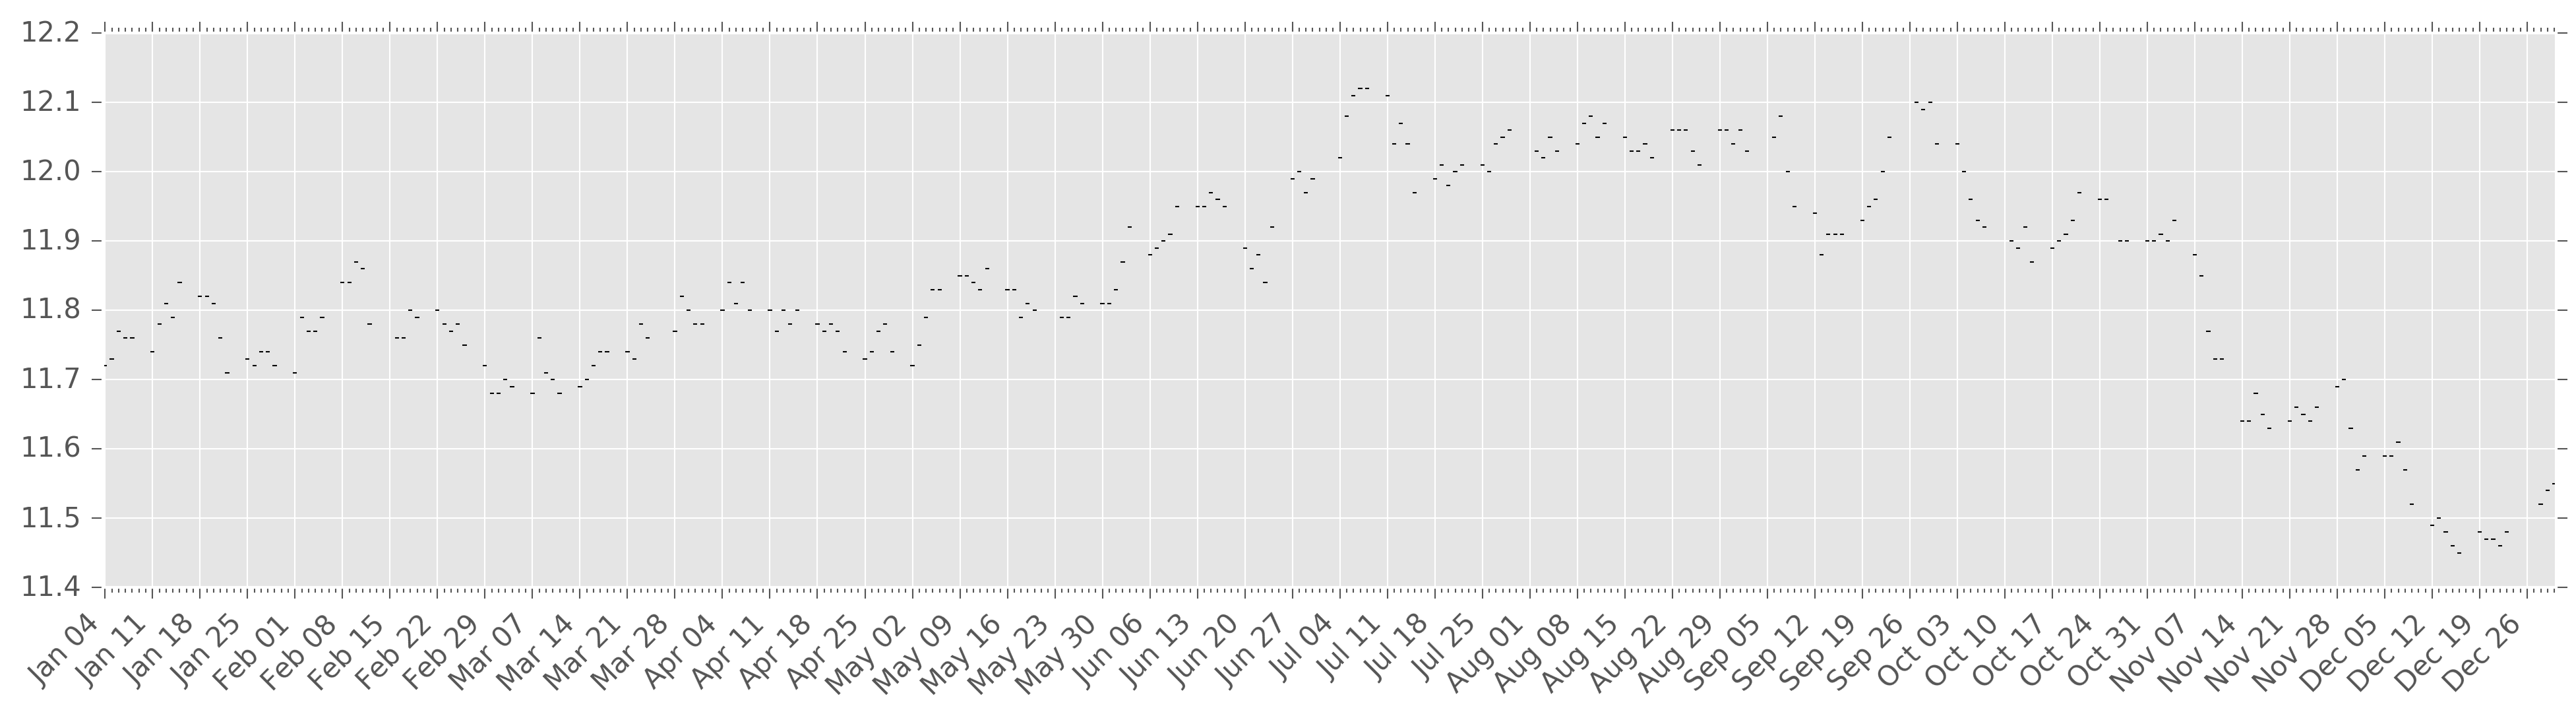

In [12]:
sp500 = Share('TDINDICIELOB.TO')
print('S&P 500: $%s on %s' % (sp500.get_price(), sp500.get_trade_datetime()))

plot_historical(sp500)

In [5]:
# gold = Share('GC=F')
# print('Gold: $%s on %s' % (gold.get_price(), gold.get_trade_datetime()))
# plot_historical(gold)